<a href="https://colab.research.google.com/github/shivanshus/Machine-Learning-Projects/blob/main/Preprocessing_of_EEG_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG Data Analysis


We will be using the Python MNE library. 

## Importing the Python MNE library and other data science libraries.

In [1]:
!pip install mne

     |████████████████████████████████| 6.9MB 6.4MB/s 


In [2]:
# Import the required libraries

import mne
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [154]:
path = '/content/drive/My Drive/raw_eeg_med_1.bdf'
print(path)

/content/drive/My Drive/raw_eeg_med_1.bdf


## Read the data in .bdf format into a variable for further computations. 

In [155]:
#reading the data file in the variable 'raw'

raw_data = mne.io.read_raw_bdf(path, preload=True) 

Extracting EDF parameters from /content/drive/My Drive/raw_eeg_med_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 696575  =      0.000 ...  2720.996 secs...


## Information about the EEG data.

In [156]:
# Information about the data 

print('\n','--- Data Information ---','\n')
raw_data.info


 --- Data Information --- 



<Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2014-04-04 19:40:17 UTC
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
>

In [157]:
# Returns : (num of channels, num of recordings)

raw_data.get_data().shape 

(80, 696576)

In [158]:
raw_data.get_data()

array([[-4.04094566e-03, -4.04088316e-03, -4.04938314e-03, ...,
         1.11120107e-03,  1.11291982e-03,  1.11588856e-03],
       [-1.02229655e-02, -1.02261530e-02, -1.02329342e-02, ...,
        -3.73182123e-03, -3.73219623e-03, -3.72860249e-03],
       [-1.43506766e-02, -1.43499266e-02, -1.43538329e-02, ...,
        -8.82346807e-03, -8.82224932e-03, -8.82315557e-03],
       ...,
       [-4.05300505e+00, -4.05299626e+00, -4.05298210e+00, ...,
        -4.05221844e+00, -4.05222088e+00, -4.05221844e+00],
       [-5.00499994e-01, -5.00499994e-01, -5.00499994e-01, ...,
        -5.00499994e-01, -5.00499994e-01, -5.00499994e-01],
       [ 6.55360000e+04,  6.55360000e+04,  6.55360000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### With the user warning, we get an indication that channels GSR2 and Temp could be Bad channels.

## Removing bad channels and Interpolation.

<Figure size 3600x3240 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


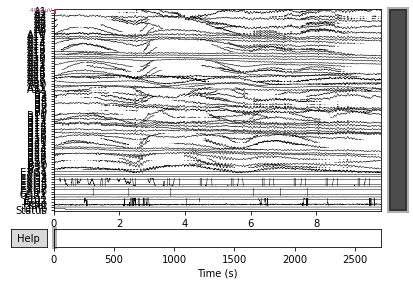

In [159]:
# Plotting the data.

plt.figure(figsize=(50,45))
raw_data.plot(n_channels=80)
plt.show()

In [160]:
#raw_data.info['bads'] += ['A1','A2','A4','A5','A6','A7','A8','A9','A15','A16','A17']

In [161]:
#picks = mne.pick_types(raw_data.info, exclude='bads')

### Since removing the bad channels is always not a right option to go with, we interpolate the bad channels instead to avoid any loss of useful information.

In [162]:
channel_names = raw_data.ch_names
#channel_names.remove('A1')
#channel_names.remove('A2')
channel_types = []
for i in range(len(channel_names)):
  channel_types.append('eeg')

In [163]:
print(channel_names)
print(channel_types)
assert len(channel_names)==len(channel_types)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']
['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg

In [164]:
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types=channel_types)
raw_data.info = info
print(raw_data.info)

<Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 80 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
>


In [165]:
montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
raw_data.set_montage(montage, match_case=True, on_missing='ignore')
print(raw_data.info['dig'])

[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 102.7, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.2, 0.0, 0.0) mm       : head frame>, <DigPoint |    EEG #93 : (-82.5, -6.2, -18.8) mm   : head frame>, <DigPoint |    EEG #94 : (82.2, -6.2, -18.8) mm    : head frame>]


In [166]:
eeg_data = raw_data.copy().pick_types(meg=False, eeg=True, exclude=[])
eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)

<ipython-input-166-f6b154aaf114>:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


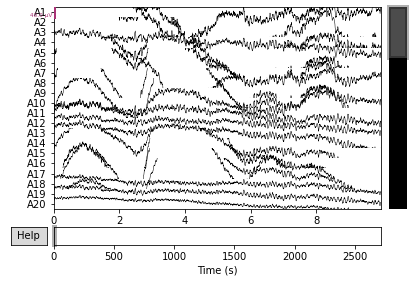

In [167]:
raw_data.plot()
plt.show()

## Filtering certain frequencies from the data using filters like low pass, high pass, band pass and notch filters.

Effective window size : 8.000 (s)


<ipython-input-168-aeccedb32bbb>:1: UserWarning: Infinite value in PSD for channels GSR2, Temp.
These channels might be dead.
  eeg_data_interp.plot_psd(tmin=0, tmax=60, fmin=0, fmax=52, average=True, spatial_colors=False);


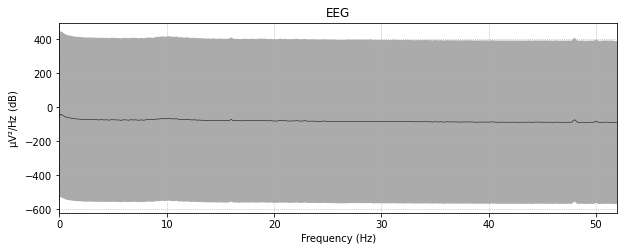

In [168]:
eeg_data_interp.plot_psd(tmin=0, tmax=60, fmin=0, fmax=52, average=True, spatial_colors=False);

In [169]:
# only keeping frequencies between 4-8 Hz for analysis the theta eeg rhythms

eeg_data_interp.filter(l_freq=4, h_freq=8) 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 423 samples (1.652 sec)



<RawEDF | raw_eeg_med_1.bdf, 80 x 696576 (2721.0 s), ~425.2 MB, data loaded>

Effective window size : 8.000 (s)


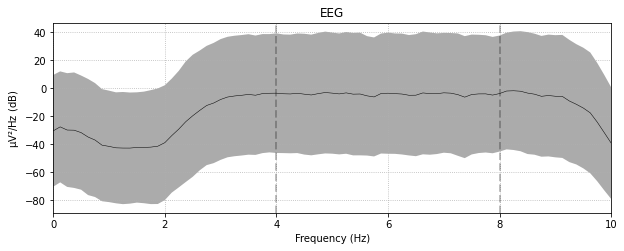

In [170]:
eeg_data_interp.plot_psd(tmin=0, tmax=60, fmin=0, fmax=10, average=True, spatial_colors=False);

## Downsampling of the data.

In [171]:
eeg_data_interp.info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 80 EEG
 custom_ref_applied: False
 dig: 5 items (3 Cardinal, 2 EEG)
 highpass: 4.0 Hz
 lowpass: 8.0 Hz
 meas_date: unspecified
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
>

In [172]:
# Downsamping to 128 Hz

eeg_data_resampled = eeg_data_interp.copy().resample(sfreq=128, npad='auto')

In [173]:
eeg_data_resampled.info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 80 EEG
 custom_ref_applied: False
 dig: 5 items (3 Cardinal, 2 EEG)
 highpass: 4.0 Hz
 lowpass: 8.0 Hz
 meas_date: unspecified
 nchan: 80
 projs: []
 sfreq: 128.0 Hz
>

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


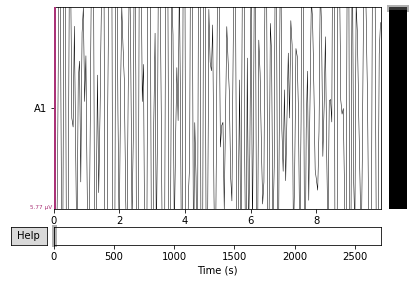

In [174]:
eeg_data_resampled.plot(scalings = 'auto',n_channels=1);

## Re-referencing the data points.

In [175]:
# re-referencing the data to the Common Average Reference method.

eeg_data_ref = eeg_data_resampled.set_eeg_reference()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


In [176]:
eeg_data_ref.info

<Info | 9 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 80 EEG
 custom_ref_applied: True
 dig: 5 items (3 Cardinal, 2 EEG)
 highpass: 4.0 Hz
 lowpass: 8.0 Hz
 meas_date: unspecified
 nchan: 80
 projs: []
 sfreq: 128.0 Hz
>

Effective window size : 16.000 (s)


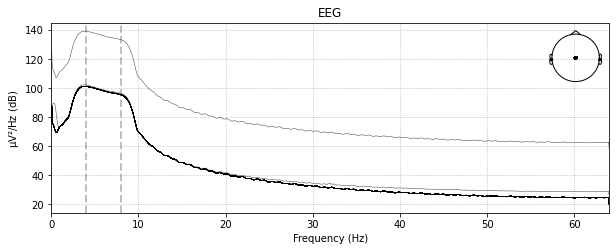

In [177]:
eeg_data_ref.plot_psd();

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


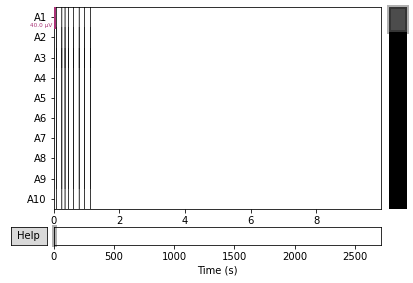

In [178]:
eeg_data_ref.plot(n_channels=10, block=True);

## Artifact Rejection.

In [179]:
reject = dict(eeg=5e-1)

In [180]:
dig = eeg_data_ref.info['chs']
dig

[{'cal': 1.0,
  'ch_name': 'A1',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([-0.08249004, -0.00621518, -0.01875643,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'logno': 1,
  'range': 1.0,
  'scanno': 1,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0 (FIFF_UNITM_NONE)},
 {'cal': 1.0,
  'ch_name': 'A2',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([ 0.08224216, -0.00621518, -0.01875643,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'logno': 2,
  'range': 1.0,
  'scanno': 2,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0 (FIFF_UNITM_NONE)},
 {'cal': 1.0,
  'ch_name': 'A3',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_

In [181]:
picks = mne.pick_types(eeg_data_ref.info, exclude=[reject]) 

## Artifact Correction - Independent Componenet Analysis.

In [182]:
"""dig_loc={}
for dictx in dig:
  loc = dictx.get('loc')
  dig_loc[dictx.get('ch_name')] = loc
print(dig_loc)
print(len(dig_loc))"""

"dig_loc={}\nfor dictx in dig:\n  loc = dictx.get('loc')\n  dig_loc[dictx.get('ch_name')] = loc\nprint(dig_loc)\nprint(len(dig_loc))"

In [183]:
eeg_data_ref.rename_channels(mapping= lambda name: name.replace(".",""))

<RawEDF | raw_eeg_med_1.bdf, 80 x 348288 (2721.0 s), ~212.7 MB, data loaded>

In [184]:

from mne.preprocessing import ICA
num_components = 25 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(eeg_data_ref, reject=reject)

Fitting ICA to data using 80 channels (please be patient, this may take a while)
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']
Artifact detected in [0, 256]
    Rejecting  epoch based on EEG : ['GSR1']
Artifact detected in [1280, 1536]
    Rejecting  epoch based on EEG : ['GSR1']
Artifact detected in [2048, 2304]
    Rejecting  epoch based on EEG : ['GSR1']
Artifact detected in [2304, 2560]
    Rejecting  epoch based on EEG : ['GSR1']
Artifact d

<ipython-input-184-717f21045246>:5: RuntimeWarning: Using n_components=25 (resulting in n_components_=25) may lead to an unstable mixing matrix estimation because the ratio between the largest (79) and smallest (1.2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 4
  ica.fit(eeg_data_ref, reject=reject)


Fitting ICA took 23.9s.


<ICA | raw data decomposition, fit (fastica): 276480 samples, 25 components, channels used: "eeg">

## How data looks like after Artificact rejection using ICA.

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 0 ICA components
    Projecting back using 80 PCA components


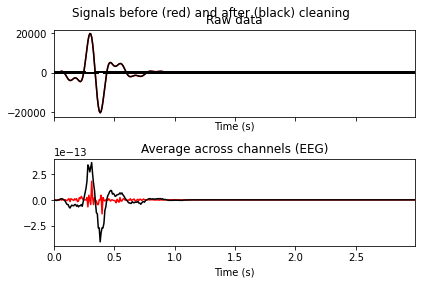

In [186]:
ica.plot_overlay(eeg_data_ref);